# Péndulo Amortiguado

En un péndulo con varilla de masa despreciable y longitud $L$ y una masa puntual $m$ en su extremo, el modelo que describe el movimiento se define de la siguiente manera:
$$ \ddot\theta-\dfrac{g}{L}\sin\theta-\frac{b}{m}\dot\theta
$$
donde $b$ es el factor de fricción viscosa.

## 1.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sympy as sym

In [2]:
theta = sym.var('theta')
theta

theta

Reescribiendo las variables como $x = [x_1,x_2]^T = [\theta,\dot\theta]^T$, se tiene
$$
\dot x = \begin{bmatrix}x_2\\
-\frac{g}{L}\sin{x_1}-\frac{b}{mL}x_2
\end{bmatrix}
$$

In [3]:
g = 9.8
def pendulo(x,t,m=3,L=1,b=0.5):
    # Inicializar dx
    dx = np.zeros(2) # Regresar un arreglo de 2 ceros
    dx[0] = x[1]
    dx[1] = -(g/L * np.sin(x[0])) - ((b/(m*L))*x[1])
    return dx

In [4]:
t = np.linspace(0,10,100)
x0 = [np.pi/2,0]
x = odeint(pendulo,x0,t)
x.shape

(100, 2)

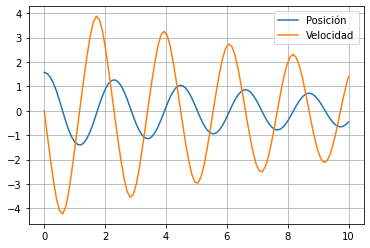

In [5]:
plt.plot(t,x[:,0],label = 'Posición')
plt.plot(t,x[:,1],label = 'Velocidad')
plt.legend()
plt.grid()

## 2.

In [6]:
# Iterando sobre la posicióin angular
posicion = []
for i in range(100):
    posicion.append(x[i,0])
posicion[0]

1.5707963267948966

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


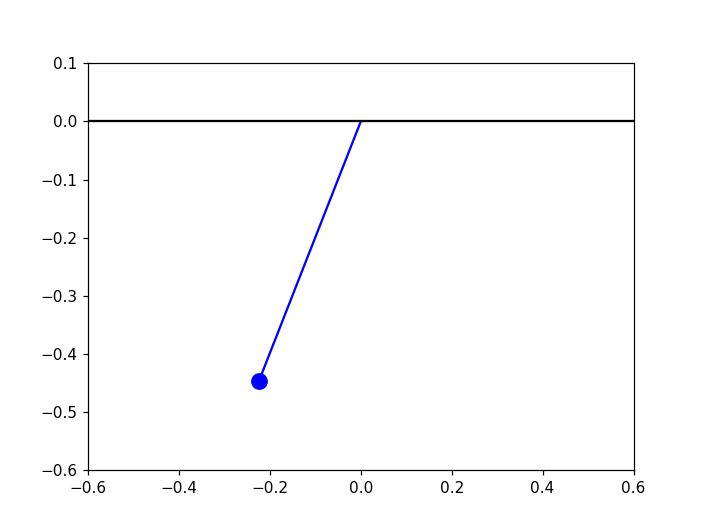

In [8]:
fig = plt.figure()
L = 0.5
def penduloAni(i):
    plt.cla()
    plt.axis([-L-0.1,L+0.1,-L-0.1,0.1])
    line=plt.plot([0,L*np.sin(posicion[i])],[0,-L*np.cos(posicion[i])],'b',[-L-0.1,L+0.1],[0,0],'k',L*np.sin(posicion[i]),-L*np.cos(posicion[i]),'ob',ms=10)
    return line
FuncAnimation(fig,penduloAni, range(len(posicion)), repeat=False)


## 3.

In [9]:
# Establecer las distintas condiciones iniciales
x0_1 = [np.pi/2,0]
x0_2 = [np.pi,0]
x0_3 = [np.pi - 0.001,0]
x0_4 = [np.pi + 0.001,0]
t = np.linspace(0,10,100)

In [7]:
len(t)

100

In [10]:
# Resolver la ecuación del péndulo para las distintas condiciones iniciales
x3_1 = odeint(pendulo,x0_1,t)
x3_2 = odeint(pendulo,x0_2,t)
x3_3 = odeint(pendulo,x0_3,t)
x3_4 = odeint(pendulo,x0_4,t)

# Agrupar en una lista las soluciones de las posiciones para cada condición inicial
posicion1 = []
posicion2 = []
posicion3 = []
posicion4 = []
for i in range(100):
    posicion1.append(x3_1[i,0])
    posicion2.append(x3_2[i,0])
    posicion3.append(x3_3[i,0])
    posicion4.append(x3_4[i,0])
len(posicion4)

100

In [11]:
# Agrupar en una lista las soluciones de las velocidades para cada condición inicial
velocidad1 = []
velocidad2 = []
velocidad3 = []
velocidad4 = []
for i in range(100):
    velocidad1.append(x3_1[i,1])
    velocidad2.append(x3_2[i,1])
    velocidad3.append(x3_3[i,1])
    velocidad4.append(x3_4[i,1])
len(velocidad4)

100

In [30]:
plt.FigureBase.add_gridspec?


Object `plt.FigureBase.add_gridspec` not found.


[Text(0.5, 1.0, '$ \\ theta_0 = \\pi + 0.001$'),
 Text(0.5, 0, 'Posición'),
 Text(0, 0.5, 'Velocidad')]

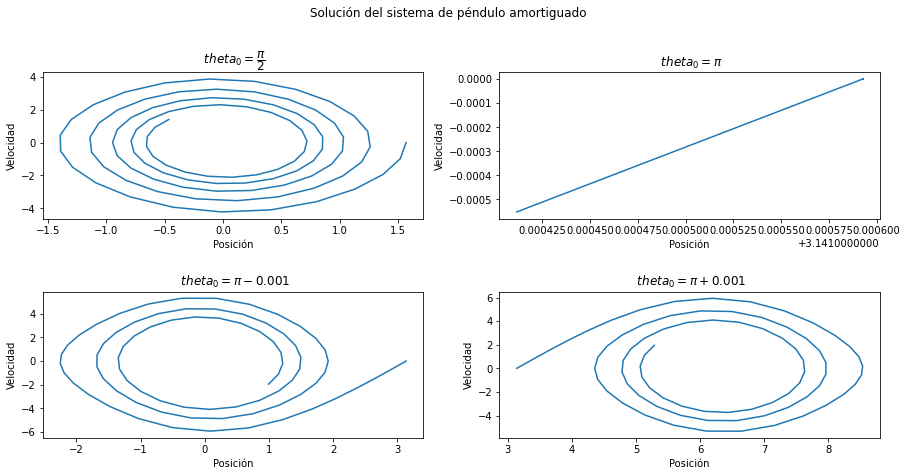

In [23]:
figura3 = plt.figure(figsize = (15,7))
gs=figura3.add_gridspec(2,2,hspace=0.5,  top=0.85) 
ax = gs.subplots()
figura3.suptitle('Solución del sistema de péndulo amortiguado')
ax[0,0].plot(posicion1,velocidad1)
ax[0,1].plot(posicion2,velocidad2)
ax[1,0].plot(posicion3,velocidad3)
ax[1,1].plot(posicion4,velocidad4)
ax[0,0].set(title='$ \ theta_0 = \dfrac{\pi}{2}$', xlabel = 'Posición', ylabel = 'Velocidad')
ax[0,1].set(title='$ \ theta_0 = \pi$', xlabel = 'Posición', ylabel = 'Velocidad')
ax[1,0].set(title='$ \ theta_0 = \pi - 0.001$', xlabel = 'Posición', ylabel = 'Velocidad')
ax[1,1].set(title='$ \ theta_0 = \pi + 0.001$', xlabel = 'Posición', ylabel = 'Velocidad')